# Dokumentation des Fuzzy-Systems

Das Fuzzy-System besteht aus drei Teilen: __Fuzzy-Mengen__, __Aggregator__, __Defuzzy__.

In [1]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import fuzzy
import matplotlib.pyplot as plt

## Fuzzy-Mengen

Das System kennt drei Typen von Fuzzy-Mengen (M1, M2, M3). Die Mengen werden durch je zwei Parameter (x1, x2) beschrieben, welche bei der Insanziierung festgelegt werden müssen. Wichtig ist, dass die Anzahl an Eingabemengen der Anzahl an Ausgabemengen entsprechen muss. 

![Fuzzy-Mengen](FuzzySets.png)

Beispielweise könnte eine Zusammenstellung an Fuzzy-Mengen folgendermaßen aussehen:

In [3]:
m1 = fuzzy.M1(800, 1400) # Geringe Höhe
m2 = fuzzy.M2(900, 2000) # Mittlere Höhe
m3 = fuzzy.M3(1400, 2000) # Große Höhe
input_sets = (m1, m2, m3)
a1 = fuzzy.M1(12, 65) # Viel Bremskraft
a2 = fuzzy.M2(30, 90) # Mittlere Bremskraft
a3 = fuzzy.M3(60, 70) # Wenig Bremskraft
output_sets = (a1, a2, a3)

Anzumerken ist an dieser Stelle, dass der Eingabemenge `m1` die Ausgabemenge `a1` zugordnet wird während der Aggregation (s.u.).

## Aggregation

Der Aggregator erstellt die geltende Ausgabefunktion, auf die im weiteren das Schwerpunktverfahren (o.ä.) angewendet werden kann.

In [17]:
agg = fuzzy.Aggregator(input_sets, output_sets, output_upper_bound=100)

Im Folgenden ist die aggregierte Funktion für die Flughöhe 1200 der Rakete dargestellt:

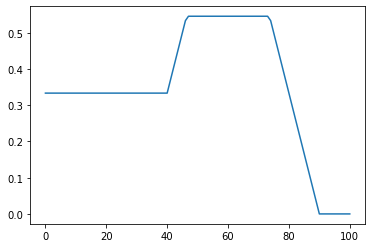

In [9]:
(x, y), _ = agg.aggregate(1200)
plt.plot(x, y)

## Defuzzy

Zur Defuzzyfizierung ist das Schwerpunktverfahren implementiert (s. Folie 148 zur Vorlesung).

In [16]:
centroid_x = fuzzy.Defuzzy().centroid(x, y)
centroid_x

45.839499872416376

Zur Visualisierung kann nun der Schwerpunkt zusammen mit der Aggregation von oben geplottet werden.

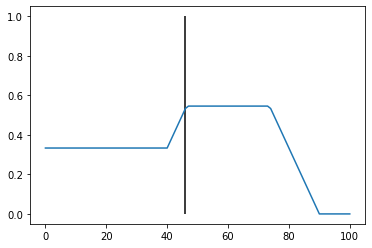

In [21]:
plt.plot(x, y)
plt.vlines(centroid_x, 0, 1)